<a href="https://colab.research.google.com/github/Arju-cmd/NLP_Models/blob/main/Sentiment_Analysis_Model_using_H20_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [6]:

!pip install h2o==3.30.0.1


     |████████████████████████████████| 129.5 MB 23 kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.1-py2.py3-none-any.whl size=129557718 sha256=baee928303a729cc65e7f2911688c210e375ac91c9b7604bd860f0a027b9b868
  Stored in directory: /root/.cache/pip/wheels/64/8d/a5/e927000e129779305658449b4c92fbbfe99c5d0abf742d368a
Successfully built h2o


In [8]:
import tensorflow_datasets as tfds
import h2o
import numpy as np

In [9]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpa2ibru3z
  JVM stdout: /tmp/tmpa2ibru3z/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpa2ibru3z/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,"1 year, 4 months and 1 day !!!"
H2O_cluster_name:,H2O_from_python_unknownUser_acsu7g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [20]:
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info=True, batch_size=-1)
train_dataset = dataset['train']

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteDTVIHF/amazon_us_reviews-train.tfrecord


Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.


In [21]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [22]:
dataset

{'train': {'data': {'customer_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
          b'35596948', b'29430209'], dtype=object)>,
   'helpful_votes': <tf.Tensor: shape=(85981,), dtype=int32, numpy=array([0, 3, 0, ..., 0, 0, 0], dtype=int32)>,
   'marketplace': <tf.Tensor: shape=(85981,), dtype=string, numpy=array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object)>,
   'product_category': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
         dtype=object)>,
   'product_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
          b'B000NURPPK', b'B001EY5GNW'], dtype=object)>,
   'product_parent': <tf.Tensor: shape=(8

In [23]:
dataset=tfds.as_numpy(train_dataset)

In [24]:

dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [25]:
helpful_votes=dataset['data']['helpful_votes']
review_headline=dataset['data']['review_headline']
review_body=dataset['data']['review_body']
rating=dataset['data']['star_rating']

In [26]:
# H2o dataframe is similar to pandas data frame

h2o_df=h2o.H2OFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),column_names=['votes','headline','reviews','rating'],column_types=['numeric','string','string','numeric'])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [27]:
h2o_df

votes,headline,reviews,rating
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4
3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5
0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4
0,b'Five Stars',b'Top quality.',5
1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3
6,b'Seems to work well!',"b'I recently picked this unit up at Bed and Bath where it was $99.00. With a 20% coupon the price was $80 (so comparison shop!) It\'s easy to use and seems to work well. I agree with other reviewers about the noise level (loud like a tea kettle boiling), but I use this unit in the living room area so sleeping is not an issue. Having the 2 separate water reservoirs to fill is much easier, weight-wise, as I previously had another humidifier which had one large water reservoir and it was very heavy when full. The unit comes apart quite easily for cleaning and since frequent cleaning is recommended (I usually do it 1x per week, not daily) this is a definite plus. Additionally, one only needs to use vinegar to clean the inside reservoir, which is a lot cheaper than having to buy some kind of \\\\""special\\\\"" cleaning solution. My one complaint is that it doesn\'t, but should, have an automatic shut off when both tanks are empty.I have to remember to turn the unit off when I leave the house. My previous humidifiers all had this auto turn off; seems like every humidifier should.'",4
8,b'deep heat?????',"b'Not sure what previous reviewer was talking about. The product uses ULTRASOUND waves for pain relief NOT heat. After repeated use, the pain in my knee and shoulder was feeling great. I think you should re-read the description and reconsider your opinion. Great product sold by a great company.'",5
2,b'Thermometer for a toddler',"b""The shippers were great....willing to consider speedier shipping options, but in the end the standard shipping arrived quickly enough. The 

In [28]:
h2o_df["target"] = (h2o_df["rating"] >= 4).ifelse("1", "0")

In [29]:
h2o_df

votes,headline,reviews,rating,target
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1
3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5,1
0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4,1
0,b'Five Stars',b'Top quality.',5,1
1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3,0
6,b'Seems to work well!',"b'I recently picked this unit up at Bed and Bath where it was $99.00. With a 20% coupon the price was $80 (so comparison shop!) It\'s easy to use and seems to work well. I agree with other reviewers about the noise level (loud like a tea kettle boiling), but I use this unit in the living room area so sleeping is not an issue. Having the 2 separate water reservoirs to fill is much easier, weight-wise, as I previously had another humidifier which had one large water reservoir and it was very heavy when full. The unit comes apart quite easily for cleaning and since frequent cleaning is recommended (I usually do it 1x per week, not daily) this is a definite plus. Additionally, one only needs to use vinegar to clean the inside reservoir, which is a lot cheaper than having to buy some kind of \\\\""special\\\\"" cleaning solution. My one complaint is that it doesn\'t, but should, have an automatic shut off when both tanks are empty.I have to remember to turn the unit off when I leave the house. My previous humidifiers all had this auto turn off; seems like every humidifier should.'",4,1
8,b'deep heat?????',"b'Not sure what previous reviewer was talking about. The product uses ULTRASOUND waves for pain relief NOT heat. After repeated use, the pain in my knee and shoulder was feeling great. I think you should re-read the description and reconsider your opinion. Great product sold by a great company.'",5,1
2,b'Thermometer for a toddler',"b""The shippers were great....willing to consider speedier shipping options, but in the end the standard shipping arrived

In [30]:
h2o_df.shape[0]

85981

In [31]:
h2o_df["target"].table()

target,Count
0,23427
1,62554


In [32]:
h2o_df.describe()

Rows:85981
Cols:5




,votes,headline,reviews,rating,target
type,int,string,string,int,enum
mins,0.0,NaN,NaN,1.0,
mean,3.3494841883672,NaN,NaN,3.977401984159291,
maxs,2785.0,NaN,NaN,5.0,
sigma,19.483167220712946,NaN,NaN,1.433130291971473,
zeros,44555,0,0,0,
missing,0,0,0,0,0
0,0.0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4.0,1
1,3.0,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5.0,1
2,0.0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4.0,1


In [33]:
# data preprocessing

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
def tokenize(line):
  tokenized = line.tokenize("\\W+")
  tokenized = tokenized.tolower()
  tokenized = tokenized[(tokenized.nchar() >= 2) | (tokenized.isna()),:]
  tokenized_filter = tokenized[(tokenized.isna()) | (~ tokenized.isin(stop_words)),:]
  return tokenized_filter

In [35]:
words_reviews = tokenize(h2o_df["reviews"])

In [36]:
words_headline = tokenize(h2o_df["headline"])

In [37]:
words_reviews.head()

C1
glasses
excellent
value
fit
good
comfortable
legal
blindness
lot
options


In [38]:
words_headline.head()

C1
glasses
excellent
value
fit
good
""
fantastic
way
cheaply
try


In [39]:
words_reviews.shape

(2797601, 1)

In [40]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OGradientBoostingEstimator, H2OXGBoostEstimator

In [28]:

vec_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v_amazon.model")
vec_model.train(training_frame=words_reviews)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [29]:
h2o.save_model(vec_model,path='/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis model using H20 GBM')

'/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis model using H20 GBM/w2v_amazon.model'

In [15]:
vec_model=h2o.load_model("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis model using H20 GBM/w2v_amazon.model")

In [41]:
vec_model.find_synonyms("perfumes", count = 5)

OrderedDict([('scents', 0.7395978569984436),
             ('fragrances', 0.7305845022201538),
             ('patchouli', 0.7229145765304565),
             ('woodsy', 0.7170096635818481),
             ('fragrance', 0.6956881284713745)])

In [42]:
vec_model.find_synonyms("toothpaste", count = 5)

OrderedDict([('mouthwash', 0.7390236854553223),
             ('listerine', 0.7304391860961914),
             ('whitening', 0.6969699859619141),
             ('mentadent', 0.6788368225097656),
             ('plax', 0.6764256358146667)])

In [43]:
vec_model.find_synonyms("glasses", count = 5)

OrderedDict([('sunglasses', 0.8963258266448975),
             ('readers', 0.8537887930870056),
             ('bifocal', 0.8075932860374451),
             ('bifocals', 0.7923863530158997),
             ('lenses', 0.7705388069152832)])

In [44]:
 # transform helps to in vector form of string
 # aggregate method = average which helps to aggregate the words to sentence and do vector space, 
 #suppose aggregate_methode = none then at word level it is represented
review_vecs = vec_model.transform(words_reviews, aggregate_method = "AVERAGE") 

In [45]:
# numerical representation
review_vecs.shape

(85981, 100)

In [46]:
review_vecs.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0.0928554,-0.0681869,0.0526175,0.178322,-0.11154,-0.175287,0.0800719,0.0381543,0.0481738,0.0723973,0.00992735,0.12043,-0.0676577,-0.0976626,0.0324151,0.0888663,0.0629005,0.0280419,-0.0533805,-0.0671065,-0.137512,-0.0436673,0.0972628,-0.0547482,0.0182456,0.116664,-0.108079,-0.212961,0.0440586,-0.098442,0.0381089,0.102497,-0.131187,0.195375,0.046057,-0.127018,-0.000842219,-0.00480667,0.0514512,-0.11523,0.0183084,0.0544952,0.0147073,0.0585335,-0.130779,-0.0567715,0.0158491,0.0765064,0.0503837,-0.0479486,0.0125844,0.133741,0.00651583,-0.0336584,-0.0779037,-0.0150825,-0.0592935,-0.0848631,-0.00519378,-0.0227161,0.0762298,0.0216118,0.0693698,-0.0395999,-0.187257,0.0521221,0.00326417,0.193554,-0.0595725,0.0279399,-0.044564,-0.174724,-0.0851853,0.217813,0.0093347,-0.065259,0.162054,0.0751151,0.0404332,0.153009,0.0326122,0.0147171,-0.0278806,-0.0537986,0.0234797,0.0161622,0.0544299,0.104015,0.0543019,0.154262,-0.0834396,0.0978944,0.0662221,0.282294,-0.178204,0.0132587,-0.0876272,0.109242,0.0119569,-0.0318945
-0.0187195,0.0352197,-0.0355229,0.0623159,-0.179573,-0.0993476,-0.0397758,-0.0191002,0.0201014,-0.100388,0.0337064,-0.0658662,-0.011768,-0.0715782,0.125187,0.0425325,0.0338431,0.0897116,-0.0354901,-0.0518855,-0.0827701,-0.138089,-0.00570933,0.0106738,-0.0486332,-0.0700158,-0.138428,-0.0418686,-0.0765158,-0.133505,0.0667318,0.211777,-0.0720769,0.187371,-0.0405274,-0.103456,-0.0890427,-0.0504157,0.0189955,-0.153807,-0.0667876,0.0581946,-0.0530559,0.240953,0.00676678,0.0396296,0.0456891,-0.143772,-0.0225959,-0.000872822,0.063284,0.112362,-0.0357453,-0.146095,-0.109007,0.0753925,-0.0176045,-0.0883622,-0.103838,-0.0520978,0.0263676,0.0497275,0.204768,0.109935,-0.0924562,0.166922,-0.00116572,-0.0694967,0.049833,-0.0380158,-0.134551,-0.151007,-0.0863211,0.0326189,-0.0621264,0.0360766,0.190622,-0.0549009,-0.0590383,0.117101,-0.0207354,0.0369261,0.00689412,-0.060246,0.0394409,0.0961615,0.134434,0.19744,0.0325088,0.148208,-0.0706438,0.128245,0.0708771,0.153812,-0.12552,0.0374693,0.0771231,0.1156,0.0767743,0.0859195
-0.0805178,-0.0461625,-0.0551182,0.193859,0.0531889,-0.088668,-0.0828386,-0.124243,0.0986724,-0.0221658,0.106922,0.0408941,-0.0566087,0.0304708,-0.0031672,0.127131,-0.074725,0.114979,0.00379095,-0.121619,-0.0696944,-0.0832596,0.136304,-0.00575639,-0.173951,-0.0135023,-0.0650375,-0.0141243,-0.013156,-0.108174,-0.026809,0.175044,-0.159644,0.19449,0.0565797,-0.104741,-0.108002,-0.0886169,-0.0414625,-0.127902,-0.0727704,-0.0916973,0.0848711,0.185968,-0.104989,-0.0408809,0.0774902,-0.0999082,-0.0169326,-0.120546,0.00680373,0.091517,0.0567199,-0.161939,-0.0781712,-0.138734,-0.128357,-0.117936,0.164488,0.00198572,-0.0828716,0.024407,0.104553,0.0664176,-0.1642,0.103785,0.0442425,-0.015685,0.0499764,0.0826374,-0.070064,-0.244971,0.127381,0.000274324,0.0102157,-0.0704978,0.137245,0.159732,-0.0420978,0.0142218,-0.0420141,0.0275792,0.145963,-0.0218821,-0.0319721,-0.0677524,-0.0724556,0.0668491,0.0127155,0.0955269,-0.152379,0.154695,-0.131206,0.124961,-0.11558,0.00301823,0.0866026,-0.0596966,0.10218,-0.0237684
-0.152333,-0.235975,-0.269967,0.164115,0.112795,-0.131884,0.0213575,-0.0956881,-0.05024,-0.227668,0.0178577,0.0738407,0.0446852,-0.0673834,0.126685,0.129214,0.160516,-0.111481,0.0817604,-0.296926,-0.313859,0.0136364,-0.061928,-0.0505257,-0.160509,0.0603329,-0.146275,0.0655819,-0.011587,-0.180369,0.059202,0.00965455,-0.0902189,0.277393,0.160684,0.0713011,0.0263919,-0.112365,-0.101889,-0.168828,-0.0021352,-0.0479388,-0.100211,-0.000184916,-0.120549,-0.329645,-0.244482,-0.043013,-0.204188,-0.0290222,-0.0148388,0.0878991,-0.063816,-0.191431,-0.360277,0.2014

In [47]:
h2o_df_ext=h2o_df.cbind(review_vecs)

In [48]:
h2o_df_ext

votes,headline,reviews,rating,target,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1,0.0928554,-0.0681869,0.0526175,0.178322,-0.11154,-0.175287,0.0800719,0.0381543,0.0481738,0.0723973,0.00992735,0.12043,-0.0676577,-0.0976626,0.0324151,0.0888663,0.0629005,0.0280419,-0.0533805,-0.0671065,-0.137512,-0.0436673,0.0972628,-0.0547482,0.0182456,0.116664,-0.108079,-0.212961,0.0440586,-0.098442,0.0381089,0.102497,-0.131187,0.195375,0.046057,-0.127018,-0.000842219,-0.00480667,0.0514512,-0.11523,0.0183084,0.0544952,0.0147073,0.0585335,-0.130779,-0.0567715,0.0158491,0.0765064,0.0503837,-0.0479486,0.0125844,0.133741,0.00651583,-0.0336584,-0.0779037,-0.0150825,-0.0592935,-0.0848631,-0.00519378,-0.0227161,0.0762298,0.0216118,0.0693698,-0.0395999,-0.187257,0.0521221,0.00326417,0.193554,-0.0595725,0.0279399,-0.044564,-0.174724,-0.0851853,0.217813,0.0093347,-0.065259,0.162054,0.0751151,0.0404332,0.153009,0.0326122,0.0147171,-0.0278806,-0.0537986,0.0234797,0.0161622,0.0544299,0.104015,0.0543019,0.154262,-0.0834396,0.0978944,0.0662221,0.282294,-0.178204,0.0132587,-0.0876272,0.109242,0.0119569,-0.0318945
3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5,1,-0.0187195,0.0352197,-0.0355229,0.0623159,-0.179573,-0.0993476,-0.0397758,-0.0191002,0.0201014,-0.100388,0.0337064,-0.0658662,-0.011768,-0.0715782,0.125187,0.0425325,0.0338431,0.0897116,-0.0354901,-0.0518855,-0.0827701,-0.138089,-0.00570933,0.0106738,-0.0486332,-0.0700158,-0.138428,-0.0418686,-0.0765158,-0.133505,0.0667318,0.211777,-0.0720769,0.187371,-0.0405274,-0.103456,-0.0890427,-0.0504157,0.0189955,-0.153807,-0.0667876,0.0581946,-0.0530559,0.240953,0.00676678,0.0396296,0.0456891,-0.143772,-0.0225959,-0.000872822,0.063284,0.112362,-0.0357453,-0.146095,-0.109007,0.0753925,-0.0176045,-0.0883622,-0.103838,-0.0520978,0.0263676,0.0497275,0.204768,0.109935,-0.0924562,0.166922,-0.00116572,-0.0694967,0.049833,-0.0380158,-0.134551,-0.151007,-0.0863211,0.0326189,-0.0621264,0.0360766,0.190622,-0.0549009,-0.0590383,0.117101,-0.0207354,0.0369261,0.00689412,-0.060246,0.0394409,0.0961615,0.134434,0.19744,0.0325088,0.148208,-0.0706438,0.128245,0.0708771,0.153812,-0.12552,0.0374693,0.0771231,0.1156,0.0767743,0.0859195
0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4,1,-0.0805178,-0.0461625,-0.0551182,0.193859,0.0531889,-0.088668,-0.08283

In [49]:
# splitting the data in to training and validation 80 :20

h2o_train,h2o_valid = h2o_df_ext.split_frame(ratios=[.8])


In [50]:
# to find how many data are there for positive and negative reviews
h2o_valid['target'].table()

target,Count
0,4697
1,12470


In [51]:
h2o_train['target'].table()

target,Count
0,18730
1,50084


In [52]:
# here stop the model when if the model is not learning anything
gbm_baseline = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10                                             
                                             )

In [53]:
gbm_baseline.train(x=review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid) # review_vec.names is nothing but c1 to c100 columns

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:

print("Baseline AUC: " + str(round(gbm_baseline.auc(valid = True), 3)))

Baseline AUC: 0.875


In [55]:
gbm_baseline.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5222887115100191: 


,,0,1,Error,Rate
0,0,2512.0,2185.0,0.4652,(2185.0/4697.0)
1,1,713.0,11757.0,0.0572,(713.0/12470.0)
2,Total,3225.0,13942.0,0.1688,(2898.0/17167.0)


In [56]:
# adding balance class is true and checking the error however there is no further improvement
gbm_balanced = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              balance_classes= True
                                             )

In [57]:

gbm_balanced.train(x=review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [58]:
print(" Balanced AUC: " + str(round(gbm_balanced.auc(valid = True), 3)))

 Balanced AUC: 0.875


In [59]:
gbm_balanced.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5405097189937541: 


,,0,1,Error,Rate
0,0,2518.0,2179.0,0.4639,(2179.0/4697.0)
1,1,710.0,11760.0,0.0569,(710.0/12470.0)
2,Total,3228.0,13939.0,0.1683,(2889.0/17167.0)


In [60]:
# adding colum which is votes below and checking the error

gbm_add_cols = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10
                                             )

In [61]:
gbm_add_cols.train(x=['votes']+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [62]:
print(" Add Columns AUC: " + str(round(gbm_add_cols.auc(valid = True), 3)))

 Add Columns AUC: 0.875


In [63]:

gbm_add_cols.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5432712637616482: 


,,0,1,Error,Rate
0,0,2627.0,2070.0,0.4407,(2070.0/4697.0)
1,1,809.0,11661.0,0.0649,(809.0/12470.0)
2,Total,3436.0,13731.0,0.1677,(2879.0/17167.0)


In [64]:
# still there is not increase in accuracy of the model

In [65]:
# Now we are adding headline column and checking the accuracy
headline_vecs = vec_model.transform(words_headline, aggregate_method = "AVERAGE")
headline_vecs.names = ["headline_" + s for s in headline_vecs.names]

In [66]:
headline_vecs.head()

headline_C1,headline_C2,headline_C3,headline_C4,headline_C5,headline_C6,headline_C7,headline_C8,headline_C9,headline_C10,headline_C11,headline_C12,headline_C13,headline_C14,headline_C15,headline_C16,headline_C17,headline_C18,headline_C19,headline_C20,headline_C21,headline_C22,headline_C23,headline_C24,headline_C25,headline_C26,headline_C27,headline_C28,headline_C29,headline_C30,headline_C31,headline_C32,headline_C33,headline_C34,headline_C35,headline_C36,headline_C37,headline_C38,headline_C39,headline_C40,headline_C41,headline_C42,headline_C43,headline_C44,headline_C45,headline_C46,headline_C47,headline_C48,headline_C49,headline_C50,headline_C51,headline_C52,headline_C53,headline_C54,headline_C55,headline_C56,headline_C57,headline_C58,headline_C59,headline_C60,headline_C61,headline_C62,headline_C63,headline_C64,headline_C65,headline_C66,headline_C67,headline_C68,headline_C69,headline_C70,headline_C71,headline_C72,headline_C73,headline_C74,headline_C75,headline_C76,headline_C77,headline_C78,headline_C79,headline_C80,headline_C81,headline_C82,headline_C83,headline_C84,headline_C85,headline_C86,headline_C87,headline_C88,headline_C89,headline_C90,headline_C91,headline_C92,headline_C93,headline_C94,headline_C95,headline_C96,headline_C97,headline_C98,headline_C99,headline_C100
0.0275628,-0.176331,0.0993222,0.197537,0.0325969,-0.206279,0.123854,0.00161491,0.0987352,0.043755,0.0173569,0.0212078,-0.162861,0.0390018,-0.0275297,0.045515,0.189821,-0.131914,0.000552059,-0.159225,-0.221795,-0.153983,-0.0218488,-0.157394,-0.0755734,0.1049,0.0029633,-0.130429,0.117263,0.00259079,0.0244566,0.116871,-0.257034,0.184044,0.210789,-0.111161,0.0122122,-0.0897414,-0.0717694,-0.0379931,0.132992,0.0743771,0.090451,0.0362759,-0.0676365,-0.0908211,-0.0312142,0.0286497,-0.0406707,-0.112079,-0.0168304,0.0800625,-0.0150814,-0.080059,-0.118964,-0.0906441,-0.0844279,-0.00814016,-0.148172,0.0865954,0.130566,0.0209817,0.0880379,0.00860375,-0.352614,0.0694347,-0.0264085,0.290327,-0.131077,-0.0413046,-0.0956954,-0.254887,-0.0410152,0.324841,0.00660134,-0.202093,0.156062,0.101742,0.0335706,0.309607,0.0215369,0.111889,0.019545,-0.149818,0.10819,0.0683292,0.0859814,0.212425,-0.019193,0.125185,-0.118326,0.0824731,0.0372536,0.393373,-0.290987,-0.102301,-0.0513173,0.0204151,-0.0461561,-0.152286
-0.0760256,-0.0352776,-0.0708371,0.18051,-0.124567,-0.0222398,-0.187585,-0.0642089,0.0845403,-0.0658035,0.0612377,-0.134388,0.0095175,-0.093165,0.180563,0.0915751,0.0910276,0.0142994,-0.151056,-0.209249,-0.0761877,-0.128147,-0.00434059,0.0950652,-0.0452795,-0.0872122,-0.0221963,0.0577099,-0.215194,-0.0539839,-0.0223353,0.261762,-0.0529793,0.182936,-0.0761971,-0.0121542,-0.00131368,-0.125777,0.0675572,-0.240639,-0.0154859,0.0676378,-0.0639176,0.263113,0.0191937,-0.0175352,-0.0084072,-0.270783,-0.017342,-0.019655,-0.0130922,0.116578,-0.015387,-0.0596685,-0.18469,0.00104496,-0.0467512,-0.10897,-0.0560438,-0.0174167,0.0458247,0.0591266,0.131198,0.176083,-0.0909278,0.246601,-0.071031,-0.109533,0.0395753,-0.0753567,-0.117876,-0.131549,-0.166389,0.125594,-0.0436575,0.0526991,0.269454,-0.00337589,-0.0405567,0.215952,-0.0103963,0.00125087,0.0156762,0.0264352,-0.0711774,0.00675418,0.147935,0.312245,0.0602059,0.177758,-0.161493,0.0961395,0.061583,0.175338,-0.115892,-0.0201333,0.181333,0.148993,0.128373,0.0676711
0.000188574,-0.205882,-0.107815,0.389001,-0.107999,-0.0210308,0.0685475,-0.0854052,0.106278,0.0553161,0.130234,-0.143691,-0.137311,0.0418573,-0.158267,0.0783279,-0.126487,0.00859156,0.0483576,-0.0572492,-0.0439109,-0.16635,-0.0450023,0.0624434,-0.174495,0.117486,0.0516886,-0.195437,0.191867,-0.237221,-0.131354,0.103002,-0.244511,0.144443,0.275567,0.0190936,-0.093839,-0.35449,-0.00729047,-0.116436,-0.0904502,-0.00803687,0.152143,0.0321213,-0.228372,0.00516496,0.250015,-0.168625,0.0113258,-0.051841,0.206338,-0.140152,0.113304,-0.0288535,-0.1054,-0.218352,-0.242676,-0.0351442,0.101792,-0.0961047,0.0498013,-0.239584,0.0572591,0.0413867,-0.136863,0.008835,0.120931,0.0553821,-0.00862167,

In [67]:
h2o_df_ext = h2o_df_ext.cbind(headline_vecs)

In [68]:
h2o_train,h2o_valid = h2o_df_ext.split_frame(ratios=[.8])

In [69]:
h2o_df_ext

votes,headline,reviews,rating,target,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,headline_C1,headline_C2,headline_C3,headline_C4,headline_C5,headline_C6,headline_C7,headline_C8,headline_C9,headline_C10,headline_C11,headline_C12,headline_C13,headline_C14,headline_C15,headline_C16,headline_C17,headline_C18,headline_C19,headline_C20,headline_C21,headline_C22,headline_C23,headline_C24,headline_C25,headline_C26,headline_C27,headline_C28,headline_C29,headline_C30,headline_C31,headline_C32,headline_C33,headline_C34,headline_C35,headline_C36,headline_C37,headline_C38,headline_C39,headline_C40,headline_C41,headline_C42,headline_C43,headline_C44,headline_C45,headline_C46,headline_C47,headline_C48,headline_C49,headline_C50,headline_C51,headline_C52,headline_C53,headline_C54,headline_C55,headline_C56,headline_C57,headline_C58,headline_C59,headline_C60,headline_C61,headline_C62,headline_C63,headline_C64,headline_C65,headline_C66,headline_C67,headline_C68,headline_C69,headline_C70,headline_C71,headline_C72,headline_C73,headline_C74,headline_C75,headline_C76,headline_C77,headline_C78,headline_C79,headline_C80,headline_C81,headline_C82,headline_C83,headline_C84,headline_C85,headline_C86,headline_C87,headline_C88,headline_C89,headline_C90,headline_C91,headline_C92,headline_C93,headline_C94,headline_C95,headline_C96,headline_C97,headline_C98,headline_C99,headline_C100
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1,0.0928554,-0.0681869,0.0526175,0.178322,-0.11154,-0.175287,0.0800719,0.0381543,0.0481738,0.0723973,0.00992735,0.12043,-0.0676577,-0.0976626,0.0324151,0.0888663,0.0629005,0.0280419,-0.0533805,-0.0671065,-0.137512,-0.0436673,0.0972628,-0.0547482,0.0182456,0.116664,-0.108079,-0.212961,0.0440586,-0.098442,0.0381089,0.102497,-0.131187,0.195375,0.046057,-0.127018,-0.000842219,-0.00480667,0.0514512,-0.11523,0.0183084,0.0544952,0.0147073,0.0585335,-0.130779,-0.0567715,0.0158491,0.0765064,0.0503837,-0.0479486,0.0125844,0.133741,0.00651583,-0.0336584,-0.0779037,-0.0150825,-0.0592935,-0.0848631,-0.00519378,-0.0227161,0.0762298,0.0216118,0.0693698,-0.0395999,-0.187257,0.0521221,0.00326417,0.193554,-0.0595725,0.0279399,-0.044564,-0.174724,-0.0851853,0.217813,0.0093347,-0.065259,0.162054,0.0751151,0.0404332,0.153009,0.0326122,0.0147171,-0.0278806,-0.0537986,0.0234797,0.0161622,0.0544299,0.104015,0.0543019,0.154262,-0.0834396,0.0978944,0.0662221,0.282294,-0.178204,0.0132587,-0.0876272,0.109242,0.0119569,-0.0318945,0.0275628,-0.176331,0.0993222,0.197537,0.0325969,-0.206279,0.123854,0.00161491,0.0987352,0.043755,0.0173569,0.0212078,-0.162861,0.0390018,-0.0275297,0.045515,0.189821,-0.131914,0.000552059,-0.159225,-0.221795,-0.153983,-0.0218488,-0.157394,-0.0755734,0.1049,0.0029633,-0.130429,0.117263,0.00259079,0.0244566,0.116871,-0.257034,0.184044,0.210789,-0.111161,0.0122122,-0.0897414,-0.0717694,-0.0379931,0.132992,0.0743771,0.090451,0.0362759,-0.0676365,-0.0908211,-0.0312142,0.0286497,-0.0406707,-0.112079,-0.0168304,0.0800625,-0.0150814,-0.080059,-0.118964,-0.0906441,-0.0844279,-0.00814016,-0.148172,0.0865954,0.130566,0.0209817,0.0880379,0.00860375,-0.352614,0.0694347,-0.0264085,0.290327,-0.131077,-0.0413046,-0.0956954,-0.254887,-0.0410152,0.324841,0.00660134,-0.202093,0.156062,0.101742,0.0335706,0.309607,0.0215369,0.111889,0.019545,-0.149818,0.10819,0.0683292,0.0859814,0.212

In [70]:
gbm_all_cols = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10
                                             )

In [71]:
gbm_all_cols.train(x=['votes']+headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
gbm_all_cols = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10
                                             )

In [73]:
gbm_all_cols.train(x=['votes']+headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [74]:
print(" All Columns AUC: " + str(round(gbm_all_cols.auc(valid = True), 3)))

 All Columns AUC: 0.925


In [75]:
gbm_all_cols.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5613193893909637: 


,,0,1,Error,Rate
0,0,3227.0,1526.0,0.3211,(1526.0/4753.0)
1,1,672.0,11796.0,0.0539,(672.0/12468.0)
2,Total,3899.0,13322.0,0.1276,(2198.0/17221.0)


In [76]:
gbm_all_cols.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-08-05 15:04:23,0.009 sec,0.0,0.444776,0.584826,0.500000,0.728418,1.000000,0.271582,0.447039,0.589185,0.500000,0.724000,1.000000,0.276000
1,,2021-08-05 15:04:32,8.783 sec,10.0,0.365831,0.430313,0.892031,0.953840,1.372232,0.154610,0.368673,0.435361,0.884789,0.948600,1.376550,0.158237
2,,2021-08-05 15:04:40,16.881 sec,20.0,0.335274,0.371488,0.913708,0.963738,1.372839,0.138002,0.339806,0.379080,0.905411,0.958075,1.374275,0.145694
3,,2021-08-05 15:04:48,24.926 sec,30.0,0.318209,0.337460,0.924149,0.968201,1.372839,0.128941,0.324848,0.348193,0.914728,0.962419,1.373232,0.138378
4,,2021-08-05 15:04:56,33.007 sec,40.0,0.306770,0.314668,0.931978,0.971708,1.372839,0.122935,0.315729,0.328678,0.921300,0.965868,1.381216,0.133616
5,,2021-08-05 15:05:04,41.031 sec,50.0,0.298520,0.298545,0.937468,0.974058,1.372839,0.116987,0.309733,0.315978,0.925266,0.967592,1.381216,0.127635


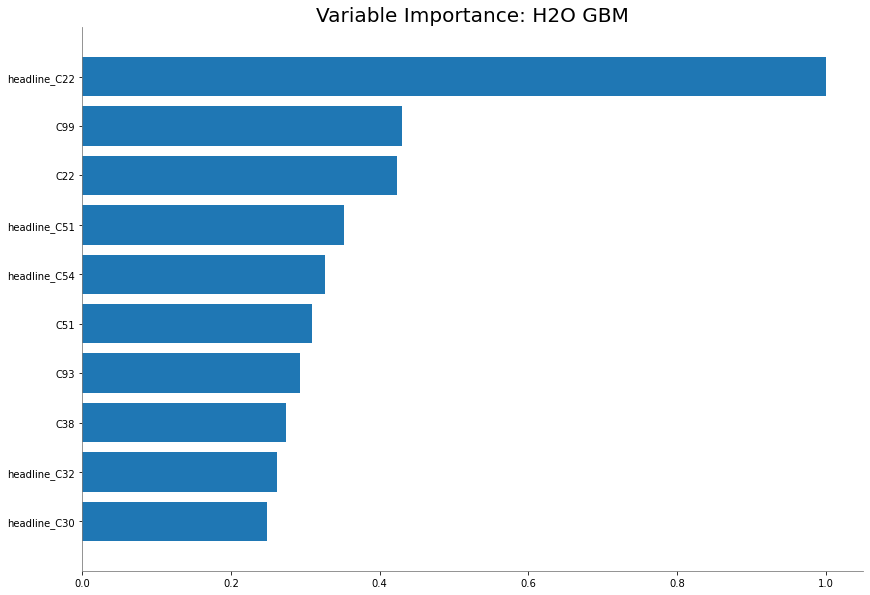

In [77]:
gbm_all_cols.varimp_plot()

In [78]:
gbm_hyperparameters = H2OGradientBoostingEstimator(ntrees=100,
                                              max_depth = 6,  learn_rate=0.1
                                             )

In [79]:
gbm_hyperparameters.train(x=headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [80]:
# above we are removing votes column and checking the accuracy as votes dont contribute much

In [81]:
print(" Hyperparameter AUC: " + str(round(gbm_hyperparameters.auc(valid = True), 3)))


 Hyperparameter AUC: 0.936


In [82]:
# above from 0.92 it has increased to .93 and there is an improvement in score and increasing the number of trees make increase in accuracy

In [83]:
gbm_hyperparameters.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5510734099369972: 


,,0,1,Error,Rate
0,0,3453.0,1300.0,0.2735,(1300.0/4753.0)
1,1,723.0,11745.0,0.058,(723.0/12468.0)
2,Total,4176.0,13045.0,0.1175,(2023.0/17221.0)


In [84]:
gbm_hyperparameters.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-08-05 15:05:23,0.003 sec,0.0,0.444776,0.584826,0.500000,0.728418,1.000000,0.271582,0.447039,0.589185,0.500000,0.724000,1.000000,0.276000
1,,2021-08-05 15:05:25,1.316 sec,1.0,0.430376,0.554041,0.834426,0.925579,1.363386,0.186475,0.432693,0.558380,0.828902,0.921465,1.368448,0.192556
2,,2021-08-05 15:05:26,2.523 sec,2.0,0.417591,0.528391,0.860672,0.937385,1.366051,0.174316,0.420017,0.532864,0.853336,0.932881,1.371747,0.177806
3,,2021-08-05 15:05:27,3.656 sec,3.0,0.406513,0.506972,0.872603,0.943675,1.368455,0.167219,0.409045,0.511596,0.864482,0.938755,1.374250,0.174670
4,,2021-08-05 15:05:32,8.559 sec,8.0,0.368018,0.435050,0.896698,0.955760,1.372839,0.152341,0.372403,0.442712,0.884185,0.948612,1.375984,0.159863
5,,2021-08-05 15:05:37,13.410 sec,13.0,0.344725,0.391459,0.912988,0.963193,1.372839,0.138613,0.351192,0.402193,0.899214,0.955777,1.381216,0.149411
6,,2021-08-05 15:05:41,17.482 sec,17.0,0.331682,0.366315,0.920857,0.966777,1.372839,0.132039,0.340054,0.379862,0.905932,0.958836,1.381216,0.146159
7,,2021-08-05 15:05:45,21.747 sec,21.0,0.321725,0.346910,0.926207,0.969073,1.370889,0.127865,0.331794,0.362928,0.910414,0.960714,1.373232,0.142849
8,,2021-08-05 15:05:50,26.627 sec,26.0,0.311971,0.327908,0.932154,0.971728,1.371006,0.121611,0.324106,0.346962,0.915297,0.962912,1.374022,0.137507
9,,2021-08-05 15:05:55,31.500 sec,31.0,0.304287,0.312778,0.936870,0.973820,1.370843,0.116885,0.318439,0.334766,0.918976,0.964748,1.373232,0.135184


In [85]:
# we can use xg boost and try the accuracy
xgb_all_feat = H2OXGBoostEstimator(ntrees = 100,learn_rate = 0.1, max_leaves = 6, tree_method="hist",  grow_policy="lossguide")

In [86]:
xgb_all_feat.train(x=headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [87]:
print(" XGBoost AUC: " + str(round(xgb_all_feat.auc(valid = True), 3)))

 XGBoost AUC: 0.923


In [88]:
xgb_all_feat.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5399396589824131: 


,,0,1,Error,Rate
0,0,3141.0,1612.0,0.3392,(1612.0/4753.0)
1,1,613.0,11855.0,0.0492,(613.0/12468.0)
2,Total,3754.0,13467.0,0.1292,(2225.0/17221.0)


In [89]:
# here also there is no much improvement in the accuracy

In [90]:
# we will try and split the data in to 3 sets and cal the accuracy also add 200 trees
h2o_train, h2o_valid, h2o_test = h2o_df_ext.split_frame(ratios=[.7,.15])


In [91]:
gbm_final = H2OGradientBoostingEstimator(ntrees=200,
                                              max_depth = 6,  learn_rate=0.1
                                             )

In [92]:
gbm_final.train(x=headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [93]:
print(" GBM Final AUC: " + str(round(gbm_final.auc(valid = True), 3)))

 GBM Final AUC: 0.938


In [94]:
gbm_final.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5079859384200694: 


,,0,1,Error,Rate
0,0,2468.0,1020.0,0.2924,(1020.0/3488.0)
1,1,484.0,8858.0,0.0518,(484.0/9342.0)
2,Total,2952.0,9878.0,0.1172,(1504.0/12830.0)


In [95]:
gbm_final.model_performance(h2o_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08344421021027576
RMSE: 0.2888671151416785
LogLoss: 0.26912013010091823
Mean Per-Class Error: 0.14026769351235735
AUC: 0.9400312079483443
AUCPR: 0.9755324722420703
Gini: 0.8800624158966885

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.493092710673753: 


,,0,1,Error,Rate
0,0,2477.0,1030.0,0.2937,(1030.0/3507.0)
1,1,488.0,8921.0,0.0519,(488.0/9409.0)
2,Total,2965.0,9951.0,0.1175,(1518.0/12916.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.493093,0.921591,240.0
1,max f2,0.240859,0.956052,313.0
2,max f0point5,0.777804,0.925072,141.0
3,max accuracy,0.589381,0.883013,211.0
4,max precision,0.998558,1.000000,0.0
5,max recall,0.006422,1.000000,395.0
6,max specificity,0.998558,1.000000,0.0
7,max absolute_mcc,0.589381,0.700683,211.0
8,max min_per_class_accuracy,0.752222,0.858569,151.0
9,max mean_per_class_accuracy,0.745577,0.859732,154.0



Gains/Lift Table: Avg response rate: 72.85 %, avg score: 73.34 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010065,0.998233,1.372728,1.372728,1.000000,0.998550,1.000000,0.998550,0.013817,0.013817,37.272824,37.272824
1,,2,0.020130,0.997905,1.372728,1.372728,1.000000,0.998038,1.000000,0.998294,0.013817,0.027633,37.272824,37.272824
2,,3,0.030040,0.997509,1.372728,1.372728,1.000000,0.997705,1.000000,0.998100,0.013604,0.041237,37.272824,37.272824
3,,4,0.040028,0.997117,1.372728,1.372728,1.000000,0.997307,1.000000,0.997902,0.013710,0.054947,37.272824,37.272824
4,,5,0.050015,0.996812,1.372728,1.372728,1.000000,0.996981,1.000000,0.997718,0.013710,0.068658,37.272824,37.272824
5,,6,0.100031,0.994286,1.368478,1.370603,0.996904,0.995643,0.998452,0.996681,0.068445,0.137103,36.847831,37.060327
6,,7,0.150046,0.990618,1.368478,1.369895,0.996904,0.992440,0.997936,0.995267,0.068445,0.205548,36.847831,36.989495
7,,8,0.200062,0.985972,1.366353,1.369010,0.995356,0.988338,0.997291,0.993535,0.068339,0.273887,36.635334,36.900955
8,,9,0.300015,0.973186,1.358905,1.365643,0.989930,0.980157,0.994839,0.989078,0.135827,0.409714,35.890526,36.564319
9,,10,0.400046,0.951723,1.331291,1.357054,0.969814,0.963283,0.988581,0.982628,0.133170,0.542884,33.129140,35.705358


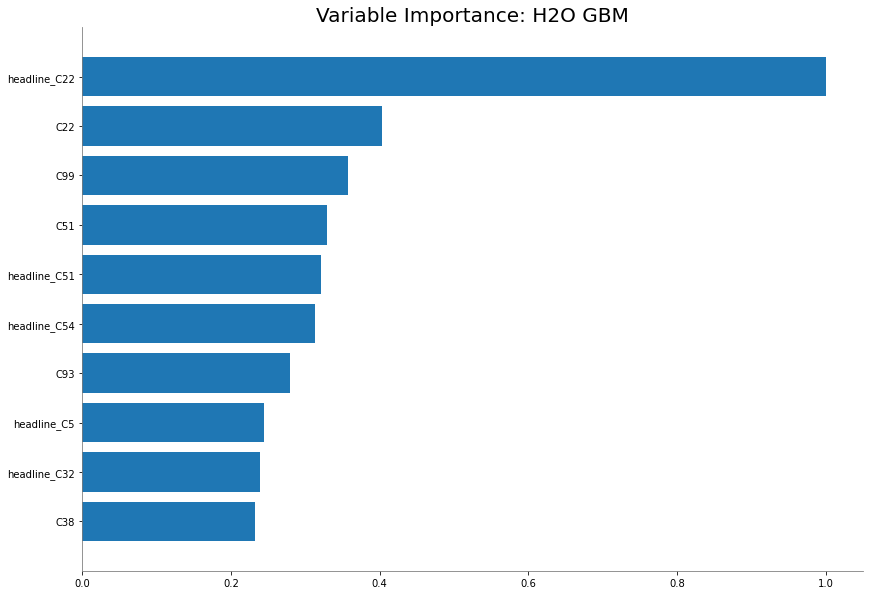

In [96]:

gbm_final.varimp_plot()

In [97]:
# we will use grid search to find the best parameter
ntrees_opt = [100, 200, 250, 300]
max_depth_opt = [6, 7, 8]
learn_rate_opt = [0.01, 0.1]

In [98]:

hyper_parameters = {"ntrees": ntrees_opt,"max_depth":max_depth_opt, "learn_rate":learn_rate_opt}
search_criteria = {"strategy":"RandomDiscrete","max_models":4}

In [99]:
from h2o.grid.grid_search import H2OGridSearch
gs = H2OGridSearch(H2OGradientBoostingEstimator,hyper_params=hyper_parameters, search_criteria=search_criteria)

In [100]:
gs.train(x=headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [101]:

print(gs.get_grid(sort_by='auc', decreasing=True))

     ...                 auc
0    ...  0.9401149538731074
1    ...  0.9360097083016622
2    ...  0.9205361588387454
3    ...  0.9073532718962798

[4 rows x 6 columns]



In [102]:
gs.models[0]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Grid_GBM_py_391_sid_b218_model_python_1628174277977_220_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,300.0,300.0,235019.0,6.0,6.0,6.0,34.0,64.0,57.663334




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.029915931823630438
RMSE: 0.17296222658034452
LogLoss: 0.12194439744905626
Mean Per-Class Error: 0.034488399903293665
AUC: 0.9943680127627723
AUCPR: 0.9977659447187822
Gini: 0.9887360255255446

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5688334282936537: 


,,0,1,Error,Rate
0,0,15397.0,1035.0,0.063,(1035.0/16432.0)
1,1,717.0,43086.0,0.0164,(717.0/43803.0)
2,Total,16114.0,44121.0,0.0291,(1752.0/60235.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.568833,0.980074,203.0
1,max f2,0.456568,0.985899,232.0
2,max f0point5,0.700192,0.982616,165.0
3,max accuracy,0.568833,0.970914,203.0
4,max precision,0.999182,1.000000,0.0
5,max recall,0.029789,1.000000,380.0
6,max specificity,0.999182,1.000000,0.0
7,max absolute_mcc,0.568833,0.926328,203.0
8,max min_per_class_accuracy,0.681795,0.965372,171.0
9,max mean_per_class_accuracy,0.660432,0.965512,178.0



Gains/Lift Table: Avg response rate: 72.72 %, avg score: 72.72 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010011,0.999142,1.375134,1.375134,1.000000,0.999345,1.000000,0.999345,0.013766,0.013766,37.513412,37.513412
1,,2,0.020005,0.998904,1.375134,1.375134,1.000000,0.999027,1.000000,0.999186,0.013743,0.027510,37.513412,37.513412
2,,3,0.030016,0.998650,1.375134,1.375134,1.000000,0.998771,1.000000,0.999048,0.013766,0.041276,37.513412,37.513412
3,,4,0.040010,0.998375,1.375134,1.375134,1.000000,0.998505,1.000000,0.998912,0.013743,0.055019,37.513412,37.513412
4,,5,0.050004,0.998152,1.375134,1.375134,1.000000,0.998285,1.000000,0.998787,0.013743,0.068762,37.513412,37.513412
5,,6,0.100008,0.996511,1.375134,1.375134,1.000000,0.997384,1.000000,0.998085,0.068762,0.137525,37.513412,37.513412
6,,7,0.150012,0.994140,1.374678,1.374982,0.999668,0.995391,0.999889,0.997187,0.068740,0.206264,37.467757,37.498194
7,,8,0.200000,0.991106,1.375134,1.375020,1.000000,0.992702,0.999917,0.996066,0.068740,0.275004,37.513412,37.501998
8,,9,0.300008,0.982411,1.374678,1.374906,0.999668,0.987139,0.999834,0.993090,0.137479,0.412483,37.467757,37.490583
9,,10,0.400000,0.967592,1.373764,1.374620,0.999004,0.975653,0.999626,0.988731,0.137365,0.549848,37.376424,37.462046




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.08274535145425872
RMSE: 0.2876549173128433
LogLoss: 0.2699055498720257
Mean Per-Class Error: 0.1327631980166517
AUC: 0.9401149538731074
AUCPR: 0.9749328155310352
Gini: 0.8802299077462148

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4994280759711129: 


,,0,1,Error,Rate
0,0,2487.0,1001.0,0.287,(1001.0/3488.0)
1,1,473.0,8869.0,0.0506,(473.0/9342.0)
2,Total,2960.0,9870.0,0.1149,(1474.0/12830.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.499428,0.923277,232.0
1,max f2,0.217316,0.954312,312.0
2,max f0point5,0.730900,0.928635,156.0
3,max accuracy,0.578211,0.885659,207.0
4,max precision,0.999196,1.000000,0.0
5,max recall,0.006825,1.000000,394.0
6,max specificity,0.999196,1.000000,0.0
7,max absolute_mcc,0.661071,0.708249,182.0
8,max min_per_class_accuracy,0.770953,0.864106,141.0
9,max mean_per_class_accuracy,0.730900,0.867237,156.0



Gains/Lift Table: Avg response rate: 72.81 %, avg score: 73.77 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010600,0.999113,1.373368,1.373368,1.000000,0.999282,1.000000,0.999282,0.014558,0.014558,37.336759,37.336759
1,,2,0.020031,0.998887,1.373368,1.373368,1.000000,0.998989,1.000000,0.999144,0.012952,0.027510,37.336759,37.336759
2,,3,0.030008,0.998609,1.373368,1.373368,1.000000,0.998733,1.000000,0.999007,0.013702,0.041212,37.336759,37.336759
3,,4,0.040062,0.998363,1.373368,1.373368,1.000000,0.998481,1.000000,0.998875,0.013809,0.055020,37.336759,37.336759
4,,5,0.050039,0.998115,1.373368,1.373368,1.000000,0.998260,1.000000,0.998753,0.013702,0.068722,37.336759,37.336759
5,,6,0.100000,0.996314,1.366940,1.370156,0.995320,0.997309,0.997662,0.998031,0.068294,0.137016,36.693997,37.015628
6,,7,0.150039,0.993882,1.369089,1.369800,0.996885,0.995171,0.997403,0.997077,0.068508,0.205523,36.908918,36.980040
7,,8,0.200000,0.990567,1.358370,1.366945,0.989080,0.992295,0.995323,0.995883,0.067866,0.273389,35.836981,36.694498
8,,9,0.300000,0.980572,1.359452,1.364447,0.989867,0.985947,0.993505,0.992571,0.135945,0.409334,35.945194,36.444730
9,,10,0.400000,0.963275,1.329480,1.355705,0.968044,0.972765,0.987140,0.987619,0.132948,0.542282,32.947977,35.570542




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-08-05 17:02:51,1 min 46.451 sec,0.0,0.445398,0.586022,0.500000,0.727202,1.000000,0.272798,0.444921,0.585105,0.500000,0.728137,1.000000,0.271863
1,,2021-08-05 17:02:52,1 min 47.586 sec,1.0,0.430637,0.554486,0.839667,0.927510,1.368299,0.190902,0.430842,0.555026,0.829183,0.923249,1.367618,0.196181
2,,2021-08-05 17:02:53,1 min 48.520 sec,2.0,0.417617,0.528379,0.865362,0.939740,1.368298,0.170748,0.418775,0.530744,0.852050,0.935166,1.367618,0.185113
3,,2021-08-05 17:02:54,1 min 49.508 sec,3.0,0.406230,0.506477,0.875599,0.944581,1.369265,0.164888,0.408228,0.510316,0.860922,0.938960,1.368136,0.177942
4,,2021-08-05 17:02:58,1 min 53.805 sec,8.0,0.366703,0.432816,0.900456,0.957131,1.375134,0.149099,0.372057,0.441772,0.885892,0.951117,1.370408,0.161574
5,,2021-08-05 17:03:03,1 min 58.153 sec,13.0,0.343338,0.388948,0.914938,0.963680,1.375134,0.137196,0.351438,0.401902,0.899150,0.957125,1.373368,0.151286
6,,2021-08-05 17:03:07,2 min 2.218 sec,16.0,0.333180,0.369689,0.921032,0.966371,1.375134,0.132083,0.343153,0.385536,0.903450,0.959042,1.373368,0.148636
7,,2021-08-05 17:03:11,2 min 6.576 sec,21.0,0.320204,0.344677,0.928589,0.969757,1.375134,0.123616,0.332711,0.364223,0.909633,0.961699,1.373368,0.142323
8,,2021-08-05 17:03:15,2 min 10.961 sec,26.0,0.310096,0.325199,0.934526,0.972364,1.372909,0.118386,0.325152,0.348398,0.914167,0.963806,1.373368,0.138426
9,,2021-08-05 17:03:20,2 min 15.299 sec,31.0,0.302170,0.309953,0.939181,0.974421,1.372854,0.114236,0.319687,0.336661,0.917469,0.965234,1.373368,0.136243



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,headline_C22,4804.627441,1.000000,0.102706
1,C22,1942.803833,0.404361,0.041530
2,C99,1719.748291,0.357936,0.036762
3,C51,1585.374634,0.329968,0.033890
4,headline_C51,1550.889526,0.322791,0.033152
5,headline_C54,1510.606812,0.314407,0.032291
6,C93,1350.097290,0.280999,0.028860
7,headline_C5,1181.274902,0.245862,0.025251
8,headline_C32,1157.806396,0.240977,0.024750
9,C38,1125.144043,0.234179,0.024052



See the whole table with table.as_data_frame()
